# Explore AIMed Dataset


### AIMed dataset preprocessing

 - Download from ftp://ftp.cs.utexas.edu/pub/mooney/bio-data/interactions.tar.gz"

 - Convert the raw dataset into XML for using instructions in http://mars.cs.utu.fi/PPICorpora/ 
 
 ```python
 convert_aimed.py -i  aimed_interactions_input_dir -o aimed.xml
 ```

Acknowledgements:
 Pyysalo S, Airola A, Heimonen J, Björne J, Ginter F, Salakoski T, Comparative Analysis of Five Protein-protein Interaction Corpora, LBM'07. 2007.


In [1]:
xmlfile = "aimed.xml"

In [2]:
import sys
sys.path.append('./source')

In [8]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 10000)
pd.set_option('display.max_rows', 100)

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

#### Covert to pandas

In [4]:
from datatransformer.AimedXmlToDataFramePreprocessed import AimedXmlToDataFramePreprocessed
df = AimedXmlToDataFramePreprocessed()(xmlfile)


In [9]:
df.query("docid=='AIMed.d35'")

,docid,isValid,participant1,participant1_loc,participant2,participant2_loc,passage,passageid
696,AIMed.d35,False,presenilin 1,83-94,PS1,97-99,Most familial early-onset Alzheimer's disease cases are caused by mutations in the presenilin 1 (PS1) gene.,AIMed.d35.s292
697,AIMed.d35,False,PS1,156-158,PS1,63-65,"Although numerous studies revealed predominant localization of PS1 to endoplasmic reticulum and Golgi, there are conflicting reports on the localization of PS1 to the cell surface.",AIMed.d35.s294
698,AIMed.d35,True,PS1,13-15,ABP-280,78-84,"Cell surface PS1 formed complexes in vivo with actin-binding protein PROTEIN (ABP-280), which is known to form bridges between cell surface receptors and cytoskeleton and mediate cell adhesion and cell motility.",AIMed.d35.s299
699,AIMed.d35,False,filamin,69-75,ABP-280,78-84,"Cell surface PROTEIN formed complexes in vivo with actin-binding protein filamin (ABP-280), which is known to form bridges between cell surface receptors and cytoskeleton and mediate cell adhesion and cell motility.",AIMed.d35.s299
700,AIMed.d35,True,PS1,13-15,filamin,69-75,"Cell surface PS1 formed complexes in vivo with actin-binding protein filamin ( PROTEIN ), which is known to form bridges between cell surface receptors and cytoskeleton and mediate cell adhesion and cell motility.",AIMed.d35.s299


In [10]:
df[df['passage'].str.contains("inactive IL-1beta precursor")]["passage"].iloc[ 1]

'The PROTEIN ( PROTEIN ) processes the inactive IL-1beta precursor to the proinflammatory cytokine.'

In [11]:
df[df['passage'].str.contains("inactive IL-1beta precursor")]

,docid,isValid,participant1,participant1_loc,participant2,participant2_loc,passage,passageid
4973,AIMed.d192,False,ICE,52-54,IL-1beta,80-87,The PROTEIN (ICE) processes the inactive IL-1beta precursor to the proinflamma PROTEIN okine.,AIMed.d192.s1636
4976,AIMed.d192,False,IL-1beta,23-30,IL-1beta,80-87,The PROTEIN ( PROTEIN ) processes the inactive IL-1beta precursor to the proinflammatory cytokine.,AIMed.d192.s1636
4978,AIMed.d192,False,interleukin-1beta,4-20,IL-1beta,80-87,The PROTEIN (I PROTEIN processes the inactive IL-1beta precursor to the proinflamma PROTEIN okine.,AIMed.d192.s1636
4980,AIMed.d192,False,interleukin-1beta (IL-1beta) converting enzyme,4-49,IL-1beta,80-87,The PROTEIN ( PROTEIN ) converting enzyme ( PROTEIN ) processes the inactive IL-1beta precursor to the proinflammatory cytokine.,AIMed.d192.s1636


In [12]:
df.shape

(5834, 8)

In [13]:
df.head(n=2)

,docid,isValid,participant1,participant1_loc,participant2,participant2_loc,passage,passageid
0,AIMed.d0,False,IFN-alpha,30-38,IL-4,89-92,"Cytokines measurements during IFN-alpha treatment showed a trend to decreasing levels of IL-4 at 4, 12, and 24 weeks.",AIMed.d0.s5
1,AIMed.d0,False,IFN-gamma,10-18,IFN-alpha,54-62,Levels of IFN-gamma were slightly increased following IFN-alpha treatment (P = 0.09).,AIMed.d0.s6


In [14]:
unique_passages = df["passage"].unique()
unique_sentence_count=[ len(r.split("\n")) for r in unique_passages]
print("Unique setences :  " , sum(unique_sentence_count))

Unique setences :   5748


### Explore dataset

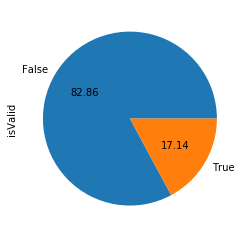

In [15]:
import matplotlib.pyplot as plt

df["isValid"].value_counts().plot.pie(autopct='%.2f',figsize=(4, 4))
plt.show()

In [16]:
df["isValid"].value_counts()

False    4834
True     1000
Name: isValid, dtype: int64

In [18]:
df.to_json("AIMedFull_preprocessed.json")

## Split into train/test/validation

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

unique_docids = df.docid.unique()
stratified =  [ df.query("docid == '{}'".format(p))['isValid'].iloc[0] for p in unique_docids]
traindocid, valdocid = train_test_split(unique_docids,  test_size=.1,
                                                        random_state=777, stratify=stratified)

In [20]:
train = df[df['docid'].isin(traindocid)]
val = df[df['docid'].isin(valdocid)]




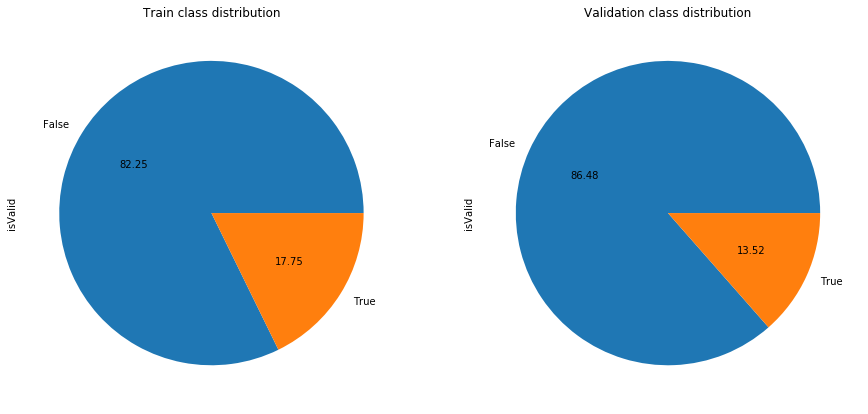

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(15,20))

ax[0].set_title('Train class distribution')
train.isValid.value_counts().plot.pie(autopct='%.2f',  ax=ax[0])

ax[1].set_title('Validation class distribution')
val.isValid.value_counts().plot.pie(autopct='%.2f',  ax=ax[1])



plt.show()

In [22]:
train.to_json("AIMedtrain_preprocessed.json")
val.to_json("AIMedval_preprocessed.json")

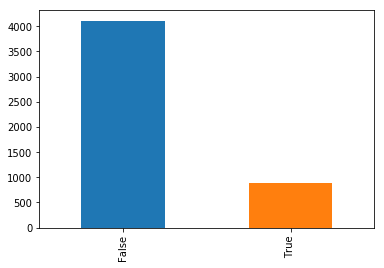

In [23]:
train.isValid.value_counts().plot.bar()

In [24]:
word_count= train.apply(lambda r: len(r["passage"].split(" ")), axis=1)

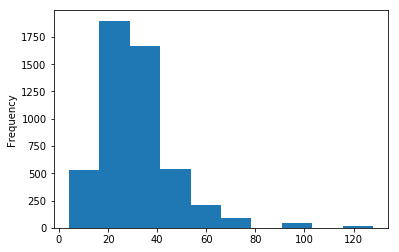

In [25]:
word_count.plot.hist()

In [26]:
train.sample(n=20).to_json("Aimedsample.json")

## Split into train/validation without looking at pubmed overlap

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split


train_p, val_p = train_test_split(df,  test_size=.1,
                                                        random_state=777, stratify=df["isValid"])

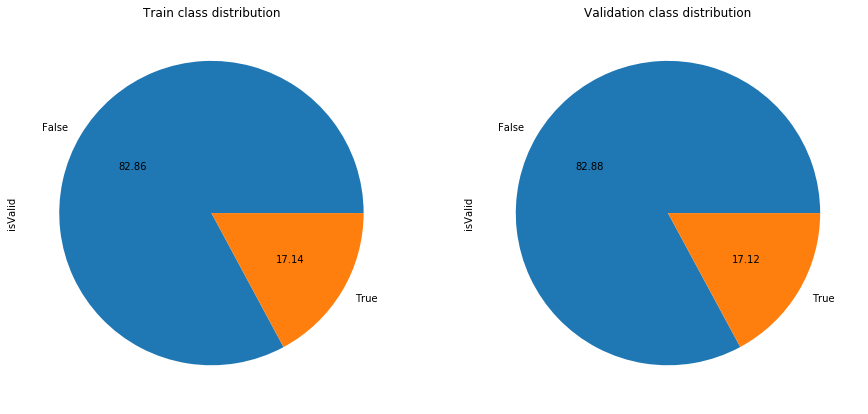

In [28]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(15,20))

ax[0].set_title('Train class distribution')
train_p.isValid.value_counts().plot.pie(autopct='%.2f',  ax=ax[0])

ax[1].set_title('Validation class distribution')
val_p.isValid.value_counts().plot.pie(autopct='%.2f',  ax=ax[1])



plt.show()

In [29]:
train_p.to_json("AIMedtrain_pubmedoverlap_preprocessed.json")
val_p.to_json("AIMedval_pubmedoverlap_preprocessed.json")

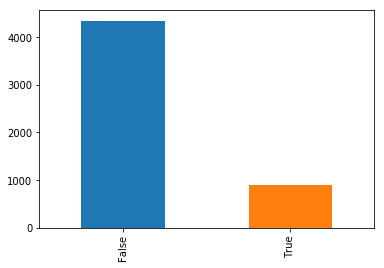

In [30]:
train_p.isValid.value_counts().plot.bar()